# Kurapati Venkatesh
# 09012021
# Topic: Principal Component Analysis

# ---------------------------------------------------------------------------

## Perform Principal component analysis and perform clustering using first 3 principal component scores (both Hierarchical & K-Mean clustering). Use Scree plot or elbow curve and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data

## -----------------------------------------------------------------------------------

### Problem Definition:
##### According to the source, the dataset is a result of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. Hence, given a set of features, we need to determine from which of the three cultivators the wine has come from. Evidently, it is a classification problem.

### Objective: 
#### To compare the obtained optimum number of clusters between the orginal data and Principal Component Scorces using Hierarchial and K-Means clustering

### PCA objectives:
#### PCA helps in Dimensionality reduction. Converts set of correlated variables to non-correlated variables. It finds a sequence of linear combinations of variables.

### PCA Benifits:
#### Principal Component Analysis (PCA) is a well-established mathematical technique for reducing the dimensionality of data, while keeping as much variation as possible. PCA achieves dimension reduction by creating new, artificial variables called principal components

## -------------------------------------------------------------------------------------------

##### Data Set Information:

##### These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

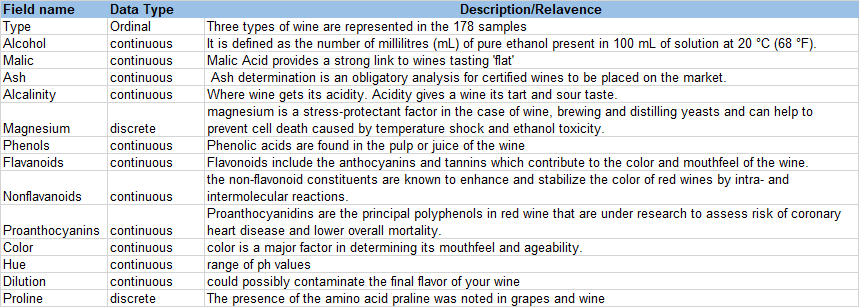

## ---------------------------------------------------------------------------------------------------------------------------

In [117]:
#importing libraries
import seaborn as sns # for data visualization
import pandas as pd # for data analysis
import numpy as np # for numeric calculation
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline

##### Load the dataset

In [119]:
win1 = pd.read_csv("G:/360digit/assignments meterial/PCA/wine.csv")
win1.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [120]:
win = win1.drop(["Type"], axis = 1)
win.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


This dataset has no null values

### ----------------------------------------------EDA---------------------------------------------------

###### Detectecting outliers via boxplot

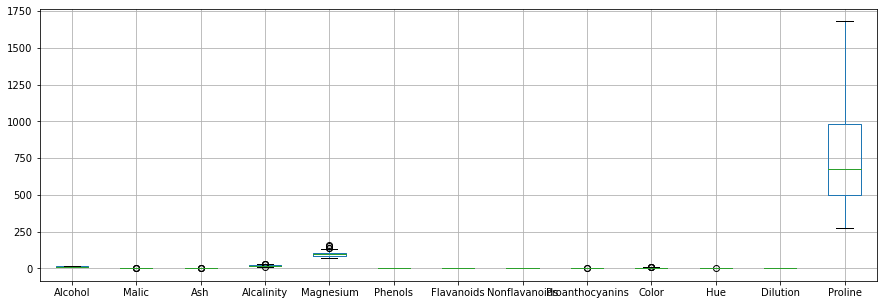

In [126]:
win.boxplot(figsize=(15,5))

Looking at the box plot, it seems that the variables Malic, Ash, Alcalinity, Magnesium, Proanthocyanins, Color and Hue columns have outlier present in the variables. These outliers value needs to be teated.

### Outliers Treatment:

In [7]:
# create a user defined function remove_ol for getting the threshold value from IQR. 
def remove_ol(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

#### Malic:

In [8]:
low, up = remove_ol(win['Malic'])
win['Malic'] = np.where(win['Malic'] > up, up, win['Malic']) 
win['Malic'] = np.where(win['Malic'] < low, low, win['Malic']) 

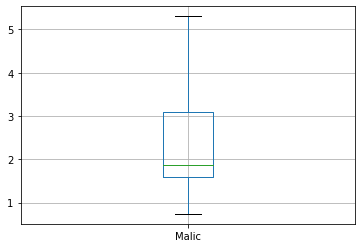

In [9]:
win.boxplot(['Malic'])

#### Magnesium :

In [18]:
low, up = remove_ol(win['Magnesium'])
win['Magnesium'] = np.where(win['Magnesium'] > up, up, win['Magnesium']) 
win['Magnesium'] = np.where(win['Magnesium'] < low, low, win['Magnesium']) 

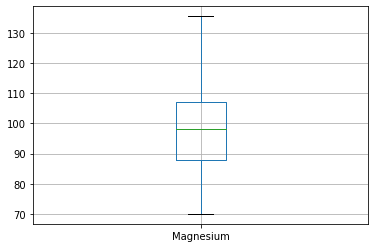

In [19]:
win.boxplot(['Magnesium'])

####  Ash:

In [16]:
low, up = remove_ol(win['Ash'])
win['Ash'] = np.where(win['Ash'] > up, up, win['Ash']) 
win['Ash'] = np.where(win['Ash'] < low, low, win['Ash']) 

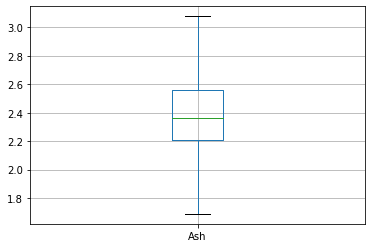

In [17]:
win.boxplot('Ash')

#### Alcalinity:

In [14]:
low, up = remove_ol(win['Alcalinity'])
win['Alcalinity'] = np.where(win['Alcalinity'] > up, up, win['Alcalinity']) 
win['Alcalinity'] = np.where(win['Alcalinity'] < low, low, win['Alcalinity'])

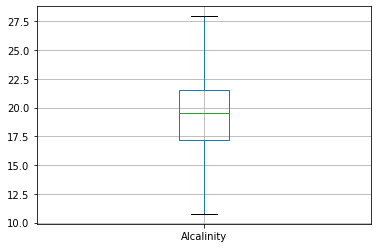

In [15]:
win.boxplot('Alcalinity')

#### Proanthocyanins:

In [12]:
low, up = remove_ol(win['Proanthocyanins'])
win['Proanthocyanins'] = np.where(win['Proanthocyanins'] > up, up, win['Proanthocyanins']) 
win['Proanthocyanins'] = np.where(win['Proanthocyanins'] < low, low, win['Proanthocyanins'])

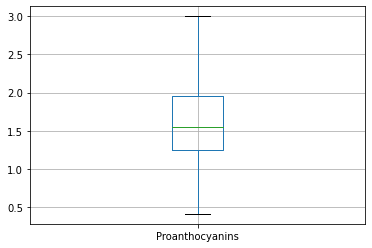

In [13]:
win.boxplot('Proanthocyanins')

#### Color:

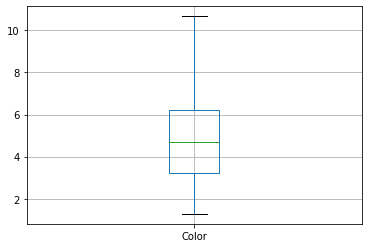

In [11]:
low, up = remove_ol(win['Color'])
win['Color'] = np.where(win['Color'] > up, up, win['Color']) 
win['Color'] = np.where(win['Color'] < low, low, win['Color'])

win.boxplot('Color')

#### Hue:

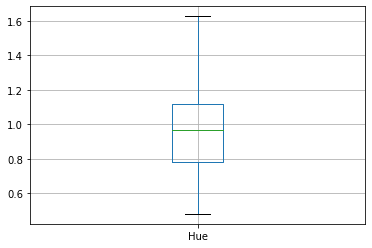

In [10]:
low, up = remove_ol(win['Hue'])
win['Hue'] = np.where(win['Hue'] > up, up, win['Hue']) 
win['Hue'] = np.where(win['Hue'] < low, low, win['Hue'])

win.boxplot('Hue')

##### Histogram Analysis:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F9F405CA0>,
      dtype=object)

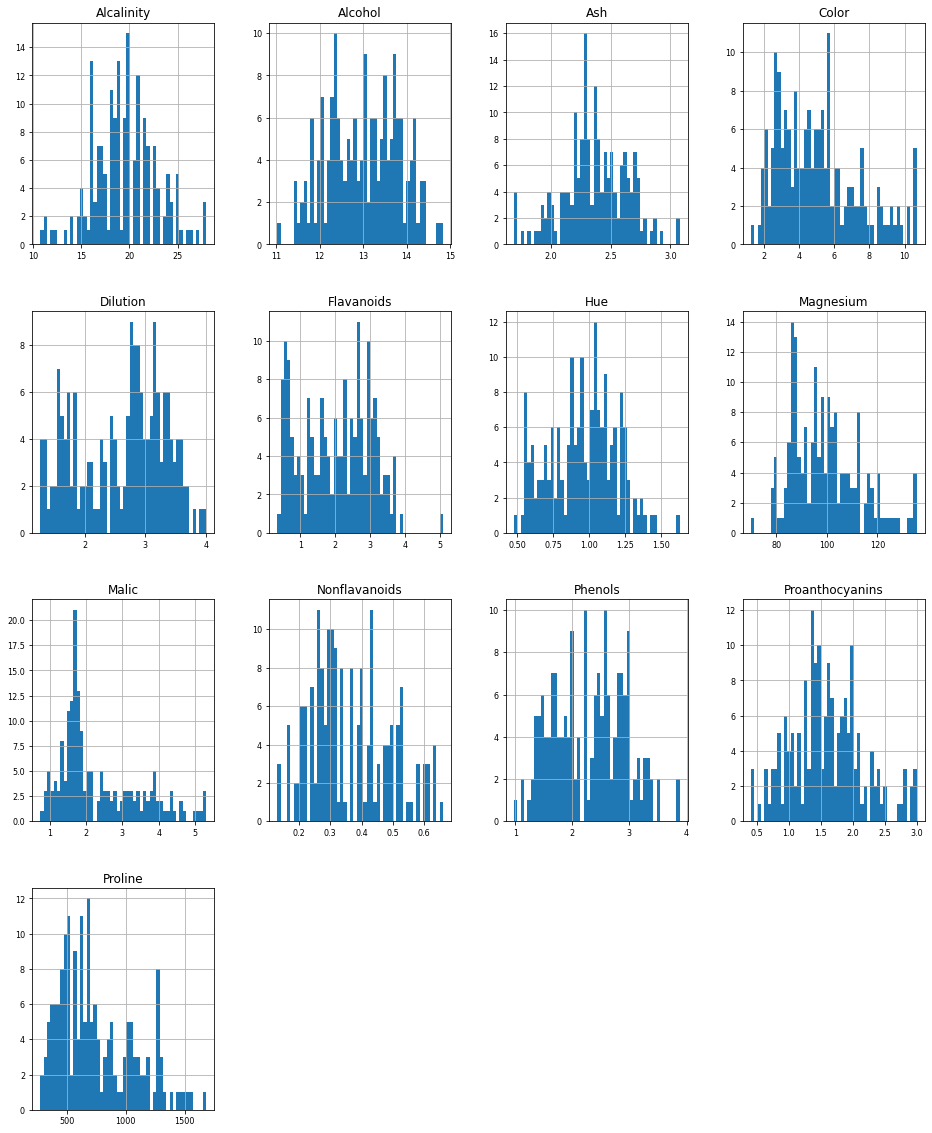

In [20]:
win.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

##### Corelation Analysis:

In [21]:
win.corr()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Alcohol,1.000000,0.094756,0.220174,-0.312191,0.302173,0.289101,0.236815,-0.155929,0.153171,0.549107,-0.067156,0.072343,0.643720
Malic,0.094756,1.000000,0.166614,0.295882,-0.039329,-0.339050,-0.414875,0.294203,-0.234575,0.264897,-0.566409,-0.372582,-0.191173
Ash,0.220174,0.166614,1.000000,0.427713,0.322510,0.124436,0.097562,0.183666,0.006080,0.256799,-0.075904,-0.011214,0.229676
Alcalinity,-0.312191,0.295882,0.427713,1.000000,-0.098030,-0.333046,-0.363405,0.369276,-0.208794,0.009748,-0.286664,-0.287032,-0.448700
Magnesium,0.302173,-0.039329,0.322510,-0.098030,1.000000,0.227035,0.209431,-0.255674,0.201428,0.240505,0.040007,0.064019,0.411557
Phenols,0.289101,-0.339050,0.124436,-0.333046,0.227035,1.000000,0.864564,-0.449935,0.618771,-0.062101,0.435952,0.699949,0.498115
Flavanoids,0.236815,-0.414875,0.097562,-0.363405,0.209431,0.864564,1.000000,-0.537900,0.665384,-0.169807,0.546718,0.787194,0.494193
Nonflavanoids,-0.155929,0.294203,0.183666,0.369276,-0.255674,-0.449935,-0.537900,1.000000,-0.368455,0.131596,-0.266995,-0.503270,-0.311385
Proanthocyanins,0.153171,-0.234575,0.006080,-0.208794,0.201428,0.618771,0.665384,-0.368455,1.000000,-0.032693,0.306289,0.530565,0.340562
Color,0.549107,0.264897,0.256799,0.009748,0.240505,-0.062101,-0.169807,0.131596,-0.032693,1.000000,-0.520416,-0.430638,0.327100


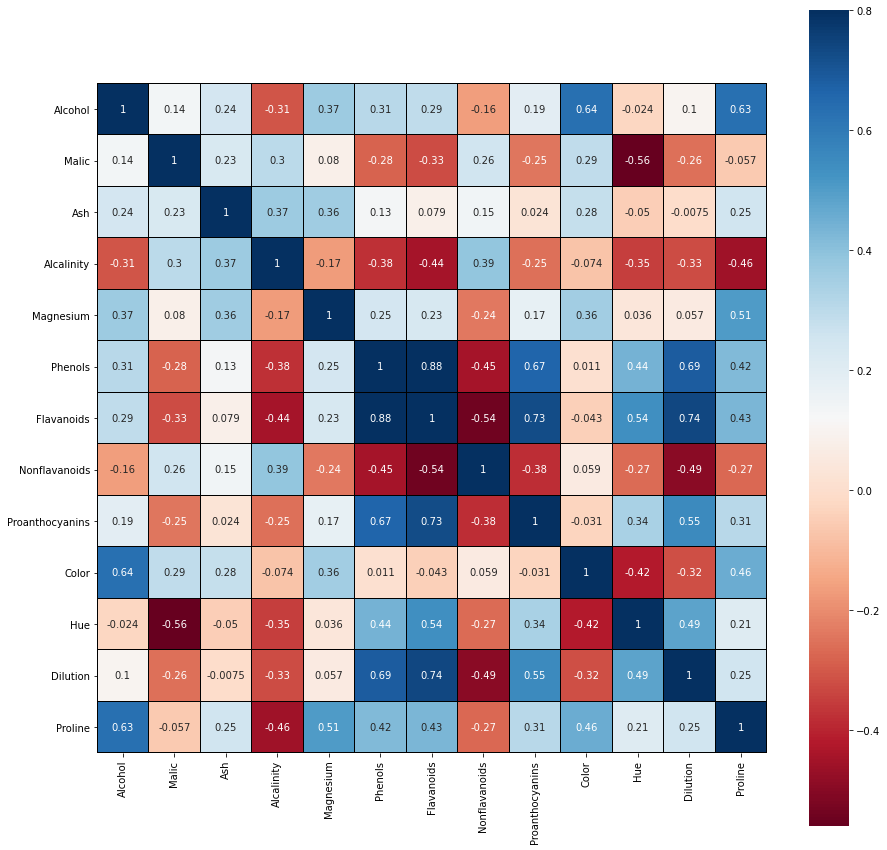

In [22]:
corr = win.corr(method='spearman')
plt.figure(figsize=(15,15))
sns.heatmap(corr, vmax = 0.8, linewidths = 0.01, square = True, annot = True, cmap='RdBu', linecolor='black')

Flavanoids and Phenols are highly corelated.

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 

### Normalization function 

In [24]:
win_normal = scale(win)
win_normal

array([[ 1.51861254, -0.56553422,  0.24064008, ...,  0.36660959,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.50172839, -0.86217567, ...,  0.41076822,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02694849,  1.15331518, ...,  0.32245097,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.77705125, -0.40583812, ..., -1.6205284 ,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.23659622,  0.0124713 , ..., -1.57636978,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.61297912,  1.41951209, ..., -1.53221115,
        -1.42894777, -0.59516041]])

In [25]:
pca = PCA(n_components = 6)
pca_values = pca.fit_transform(win_normal)

The amount of variance that each PCA explains is - 

In [26]:
var = pca.explained_variance_ratio_
var

array([0.36475803, 0.19609775, 0.10911182, 0.07062378, 0.06296983,
       0.04815067])

###### The PCA Components:

In [27]:
pca.components_
pca.components_[0]

array([ 0.14638695, -0.24575619, -0.00357256, -0.24470276,  0.14087111,
        0.39339196,  0.42172715, -0.29683634,  0.3161246 , -0.08589806,
        0.29661931,  0.37445501,  0.28670932])

###### Cumulative variance

In [28]:
var1 = np.cumsum(np.round(var, decimals = 4) * 100)
var1

array([36.48, 56.09, 67.  , 74.06, 80.36, 85.18])

###### Variance plot for PCA components obtained :

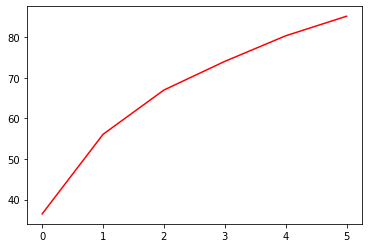

In [29]:
plt.plot(var1, color = "red")

##### PCA scores:

In [30]:
pca_values

array([[ 3.35814747, -1.52022185, -0.12637492, -0.22435626,  0.71089096,
        -0.17664455],
       [ 2.22921481,  0.33326137, -2.04283756, -0.36578314, -0.10744766,
        -0.98490211],
       [ 2.54005743, -1.03695315,  1.01884481,  0.76690731, -0.36311262,
         0.53766636],
       ...,
       [-2.67116907, -2.86530059, -0.97512583,  0.36063345,  1.18509754,
         0.3541478 ],
       [-2.37160346, -2.39380794, -0.56148477, -0.64394817,  0.65865135,
         1.25232522],
       [-3.22745394, -2.80053456,  1.03090733,  0.66791011, -0.99799937,
         0.23182472]])

In [40]:
pca_data = pd.DataFrame(pca_values) 
pca_data.columns = "comp0", "comp1", "comp2", "comp3", "comp4", "comp5"
final = pd.concat([win, pca_data.iloc[:, 0:3]], axis = 1)
#first 3 Comp's represents 70% of orginal data

##### Scatter diagram:

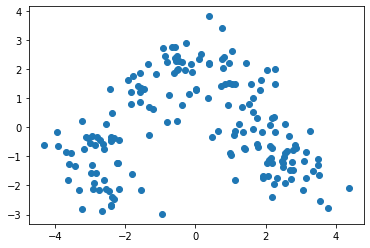

In [41]:
import matplotlib.pylab as plt
plt.scatter(x = final.comp0, y = final.comp1)

#### Hierarchial clustering:

In [42]:
# for creating dendrogram 
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch 

In [43]:
z = linkage(final, method = "complete", metric = "euclidean")

##### Dendrogram:

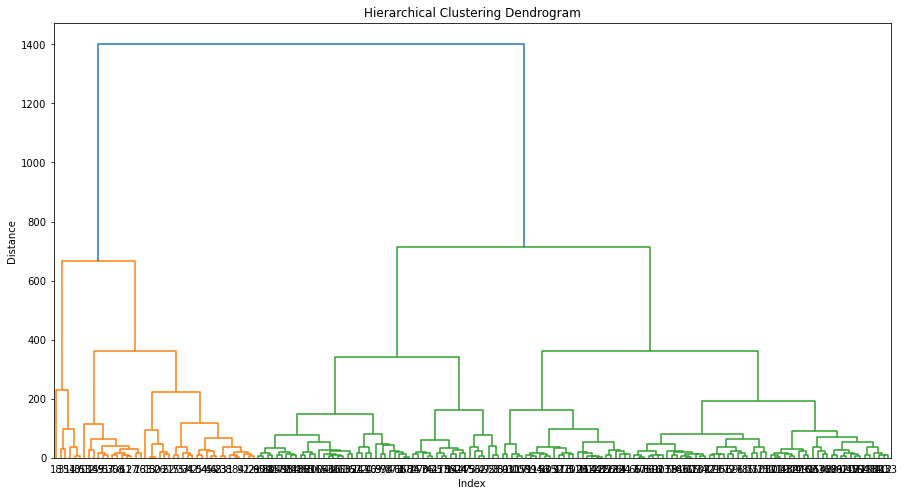

In [45]:
plt.figure(figsize=(15, 8));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, 
    leaf_rotation = 0,  # rotates the x axis labels
    leaf_font_size = 10 # font size for the x axis labels
)
plt.show()

The optimal number of clusters obtained through Hierarchieal clustering is 2

Now applying AgglomerativeClustering choosing 2 as clusters from the above dendrogram

In [46]:
from sklearn.cluster import AgglomerativeClustering

In [49]:
h_complete = AgglomerativeClustering(n_clusters = 2, linkage = 'complete', affinity = "euclidean").fit(pca_values) 
h_complete.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

#### K-means:##

In [50]:
import pandas as pd
import matplotlib.pylab as plt

#### scree plot or elbow curve:

In [51]:
TWSS = []
k = list(range(2, 10))

In [52]:
from sklearn.cluster import KMeans
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pca_values)
    TWSS.append(kmeans.inertia_)
    
TWSS

[1312.4108968892708,
 924.3882666994733,
 827.0029849164927,
 755.797868704466,
 709.5369069360275,
 651.402978816295,
 614.5618790968655,
 578.0542530091075]

Text(0, 0.5, 'total_within_SS')

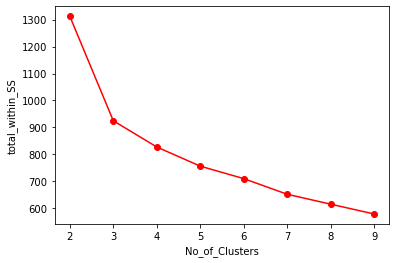

In [53]:
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

##### Selecting 3 clusters from the above scree plot which is the optimum number of clusters 

In [54]:
model = KMeans(n_clusters = 3)
model.fit(pca_values)

KMeans(n_clusters=3)

In [58]:
model.labels_ # getting the labels of clusters assigned to each row 
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 
mb

0      1
1      1
2      1
3      1
4      1
      ..
173    0
174    0
175    0
176    0
177    0
Length: 178, dtype: int32

## Clustering for orginal data:

#### Normalization function: 

In [60]:
def norm_func(i):
    x = (i - i.min())	/ (i.max() - i.min())
    return (x)

### Hierarchial clustering

Normalized data frame (considering the numerical part of data)

In [67]:
df_norm = norm_func(win1.iloc[:, 1:])
df_norm.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
# for creating dendrogram 
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch 

In [69]:
z = linkage(df_norm, method = "complete", metric = "euclidean")

### Dendrogram:

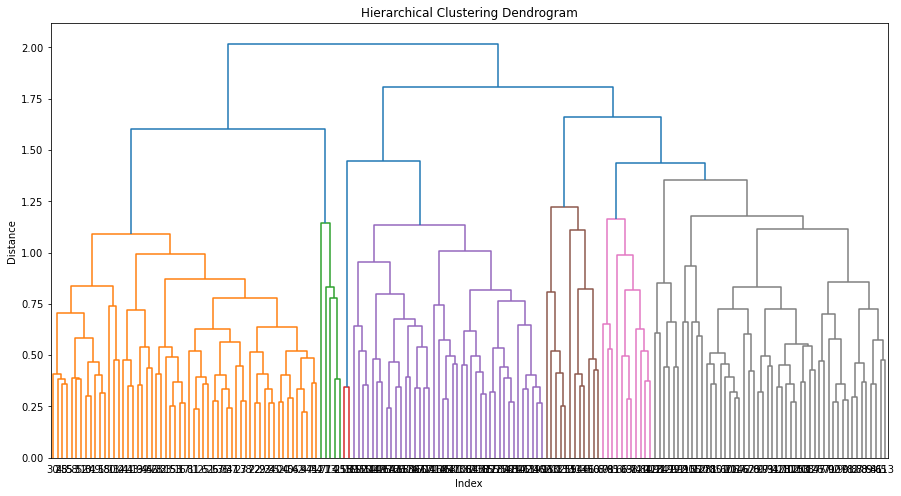

In [70]:
plt.figure(figsize=(15, 8));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, 
    leaf_rotation = 0,  # rotates the x axis labels
    leaf_font_size = 10 # font size for the x axis labels
)
plt.show()

##### Now applying AgglomerativeClustering choosing 7 as clusters from the above dendrogram

In [71]:
from sklearn.cluster import AgglomerativeClustering

In [72]:
h_complete = AgglomerativeClustering(n_clusters = 7, linkage = 'complete', affinity = "euclidean").fit(df_norm) 
h_complete.labels_

array([4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 0, 2, 0, 0,
       2, 0, 1, 2, 0, 6, 0, 6, 2, 0, 0, 0, 2, 0, 0, 0, 0, 3, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 6, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [73]:
cluster_labels = pd.Series(h_complete.labels_)

In [74]:
win['clust'] = cluster_labels # creating a new column and assigning it to new column 

In [75]:
win1 = win.iloc[:, [13,0,1,2,3,4,5,6,7,8,9,10,11,12]]
win1.head()

,clust,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,4,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,4,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,4,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,4,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,6,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### K-means clustering:

In [76]:
#Normalized data frame (considering the numerical part of data)
df_norm = norm_func(win1.iloc[:, 1:])
df_norm.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.212603,0.533273,0.281977,0.870229,0.627586,0.573840,0.283019,0.725869,0.464324,0.488550,0.970696,0.561341
1,0.571053,0.227945,0.324640,0.026163,0.458015,0.575862,0.510549,0.245283,0.335907,0.330138,0.497274,0.780220,0.550642
2,0.560526,0.355068,0.705935,0.456395,0.473282,0.627586,0.611814,0.320755,0.926641,0.468584,0.479826,0.695971,0.646933
3,0.878947,0.265205,0.583633,0.351744,0.656489,0.989655,0.664557,0.207547,0.683398,0.694356,0.331516,0.798535,0.857347
4,0.581579,0.405479,0.849820,0.595930,0.732824,0.627586,0.495781,0.490566,0.544402,0.323749,0.488550,0.608059,0.325963


#### scree plot or elbow curve:

In [87]:
TWSS = []
k = list(range(2, 10))

In [88]:
from sklearn.cluster import KMeans
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)
    
TWSS

[77.4292752811936,
 58.92147129250145,
 54.2141397793982,
 51.45893813768513,
 48.52820544796514,
 45.951336698478684,
 43.718158290510054,
 41.96578155978328]

Text(0, 0.5, 'total_within_SS')

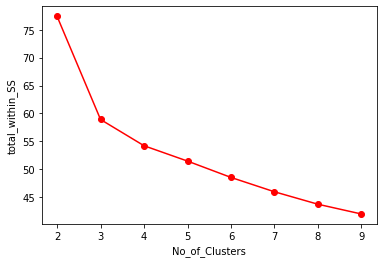

In [89]:
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

##### Selecting 3 clusters from the above scree plot which is the optimum number of clusters

In [80]:
model = KMeans(n_clusters = 3)
model.fit(df_norm)

KMeans(n_clusters=3)

In [82]:
model.labels_ # getting the labels of clusters assigned to each row 
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 
win['clust'] = mb # creating a  new column and assigning it to new column 
win.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [83]:
win1 = win.iloc[:,[13,0,1,2,3,4,5,6,7,8,9,10,11,12]]
win1.head()

,clust,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


##### In the both case senario's the optimal no. of clusters are different

#####  * The reason behind the different results yeilded in R and Python code is because, In R code, for rescaling of data, I used Normalization method. While in Python code the rescaling is done by using Standaradization method.

Normalization typically means rescales the values into a range of [0,1]. Standardization typically means rescales data to have a mean of 0 and a standard deviation of 1 (unit variance).